# Declaration of Originality

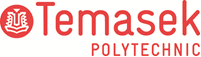

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Jerrica Low Yuin En (2404802G)
* Tutorial Group                : T07
* Tutor						    : Ms Ester
* Submission Date               : 11 Feb 2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [1]:
# To import all the required libraries throughout this porject

# Data handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Train-test split
from sklearn.model_selection import train_test_split

# Models (regression)
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV,KFold

# Regression metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Business Understanding
Goal: The goal of this project is to develop a machine learning model that is able to predict the price of a car based on its features, such as the vehicle specification, usage, and other relevant attributes.

Being able to accurately predict the car prices can help sellers to set an apporpriate competitive prices and assist buyers in making an informed purcharshing decisions beforehand. 

Problem Type: This problem is a regression task, as the target variable which is "car price" is a continuous numerical value.

# 2. Data Understanding

## 2.1 Load dataset

In [2]:
# To load my dataset from the CSV file into the pandas DataFrame to get a look at the data
FILE_PATH= "car_price_prediction.csv"
df = pd.read_csv(FILE_PATH)

# To view the first five row of my dataset 
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,26556126,157,-,ROLLS-ROYCE,Phantom,1939,Cabriolet,Yes,Petrol,5,129000 km,8,Automatic,Rear,4-May,Left wheel,Silver,0
1,20746880,157,-,MERCEDES-BENZ,S 500,1939,Limousine,Yes,Petrol,2.4,126000 km,4,Automatic,Rear,4-May,Left wheel,White,0
2,41720592,200,-,ROLLS-ROYCE,Phantom,1939,Limousine,Yes,Petrol,2.2,169000 km,4,Manual,Rear,4-May,Left wheel,White,0
3,32171534,119172,-,MERCEDES-BENZ,230 W153,1943,Sedan,Yes,Petrol,2.2,69000 km,4,Automatic,Rear,4-May,Left wheel,White,0
4,38169002,150,-,BMW,340,1947,Limousine,No,Petrol,2,165000 km,6,Manual,Rear,4-May,Left wheel,White,0


## 2.2 Summary Statistics

In [3]:
# Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                19237 non-null  int64 
 1   Price             19237 non-null  int64 
 2   Levy              19237 non-null  object
 3   Manufacturer      19237 non-null  object
 4   Model             19237 non-null  object
 5   Prod. year        19237 non-null  int64 
 6   Category          19237 non-null  object
 7   Leather interior  19237 non-null  object
 8   Fuel type         19237 non-null  object
 9   Engine volume     19237 non-null  object
 10  Mileage           19237 non-null  object
 11  Cylinders         19237 non-null  int64 
 12  Gear box type     19237 non-null  object
 13  Drive wheels      19237 non-null  object
 14  Doors             19237 non-null  object
 15  Wheel             19237 non-null  object
 16  Color             19237 non-null  object
 17  Airbags     

Insights: 

Currently, this dataset contains 19237 rows and 18 columns, which has a mix of numerical and categorical features. For the numerical (int64) there are 5 columns which includes the Price, Prod. year, Cylinders, Airbags and ID, while the remaining 13 columns are categorical (object).

The target variable which is the "Price" is numberical, which helps to confirm that this project is a regression task. But with multiple categorical variables it does indicate that feature encoding would be needed before training the model.

In [4]:
# Check for missing data
df.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

Insights:

There are no missing values in this dataset, which means all of 18 columns does contain complete data, which also includes the target variable "Price". So no imputation or removal of records is required for any missing value.

In [5]:
## Describe data distribution
df.describe(include='all')

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
count,1.923700e+04,1.923700e+04,19237,19237,19237,19237.000000,19237,19237,19237,19237,19237,19237.000000,19237,19237,19237,19237,19237,19237.000000
unique,NaN,NaN,559,65,1590,NaN,11,2,7,107,7687,NaN,4,3,3,2,16,NaN
top,NaN,NaN,-,HYUNDAI,Prius,NaN,Sedan,Yes,Petrol,2,0 km,NaN,Automatic,Front,4-May,Left wheel,Black,NaN
freq,NaN,NaN,5819,3769,1083,NaN,8736,13954,10150,3916,721,NaN,13514,12874,18332,17753,5033,NaN
mean,4.557654e+07,1.855593e+04,NaN,NaN,NaN,2010.912824,NaN,NaN,NaN,NaN,NaN,4.582991,NaN,NaN,NaN,NaN,NaN,6.582627
std,9.365914e+05,1.905813e+05,NaN,NaN,NaN,5.668673,NaN,NaN,NaN,NaN,NaN,1.199933,NaN,NaN,NaN,NaN,NaN,4.320168
min,2.074688e+07,1.000000e+00,NaN,NaN,NaN,1939.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,4.569837e+07,5.331000e+03,NaN,NaN,NaN,2009.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,4.577231e+07,1.317200e+04,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,6.000000
75%,4.580204e+07,2.207500e+04,NaN,NaN,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,12.000000


Insights:

This summary statistic does show some NaN values for certain metics, but they only appear as some statistic aren't applicable to the specific data type. 

Such as some numerical statistic such as the mean and standard deviation tend to only compute for the numerical columns, while the categorical statistic such as the unique values, as well as most frequent categoris are only computed for categorical columns. 

But this does confirm that the dataset contains a mix of numerical and categorical features, while will need the appropriate preprocessing later before training the model.

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

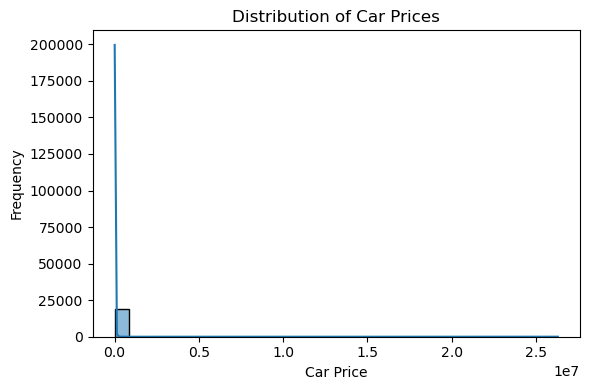

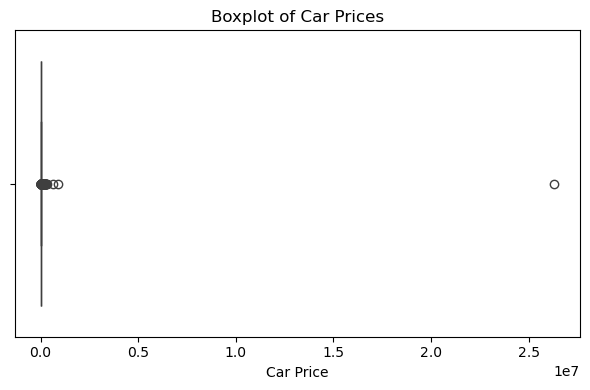

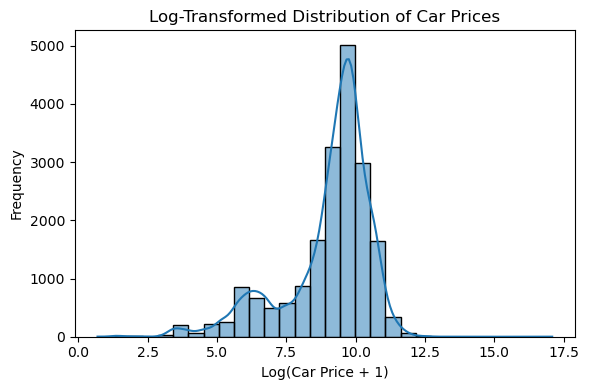

In [6]:
## Understanding distribution of target
col_y = "Price"  

# Summary statistics of target variable
df[col_y].describe()

# Histogram of target variable
plt.figure(figsize=(6, 4))
sns.histplot(df[col_y], bins=30, kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Car Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df[col_y])
plt.title("Boxplot of Car Prices")
plt.xlabel("Car Price")
plt.tight_layout()
plt.show()

# Log-transformed target distribution - histogram
plt.figure(figsize=(6, 4))
sns.histplot(np.log1p(df[col_y]), bins=30, kde=True)
plt.title("Log-Transformed Distribution of Car Prices")
plt.xlabel("Log(Car Price + 1)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Insights:

- Histogram of the Car Prices

For the historgram of the car prices it does show that it is highly right-skewed distribution. Which means most car prices are concentrated in the lower price range, while there is only a small number of car that are extremely high priced. The long right tail indicates that the presence of luxury or the rare vehicles are prices significantly higher than most of the cars in this dataset 

But this could be quite common in the real world pricing data and does negatively impact the model performance, especially for models that assumes a more symmetic distribution. As well as this large range of the values might also suggest that high prices outliers may disproportionately influence the model when training. 

- Boxplot of the Car Prices 

The boxplot does help to confirm that there is definetly many outliers in the car price data. As most of the observateion are grouped quite tightly near the lower end of the price range, while only some points are laying far above the upper whisker. 

These outliers represent the unusually expensive vehicles and identifying these outliers are important as they could distort my error metrics such as my RMSE and it could cause the model to focus more on the rare cases, as well as reducing the model ability to generalize to typical car prices, so this helps me in deciding whether i need to transform the target variable or not. 

- Log Transformed Distribution of Car Prices

After I had applied the logarithmic transformation to the car prices, the distribution has becom emore symmetric and more bell-shaped. So the extreme skewness is reduced and the influence of the larger value are compressed. 

So this help to stabilizes the variance, reducing the impact of the extreme outliers, allowing the model to learn the patterns more effectively and improving the covergence and predictive performance for many regression models, so as a result, a log transformed target variable is more suite for modelling and would expect a better performance. 

### 2.3.1.2 Understanding distribution of features

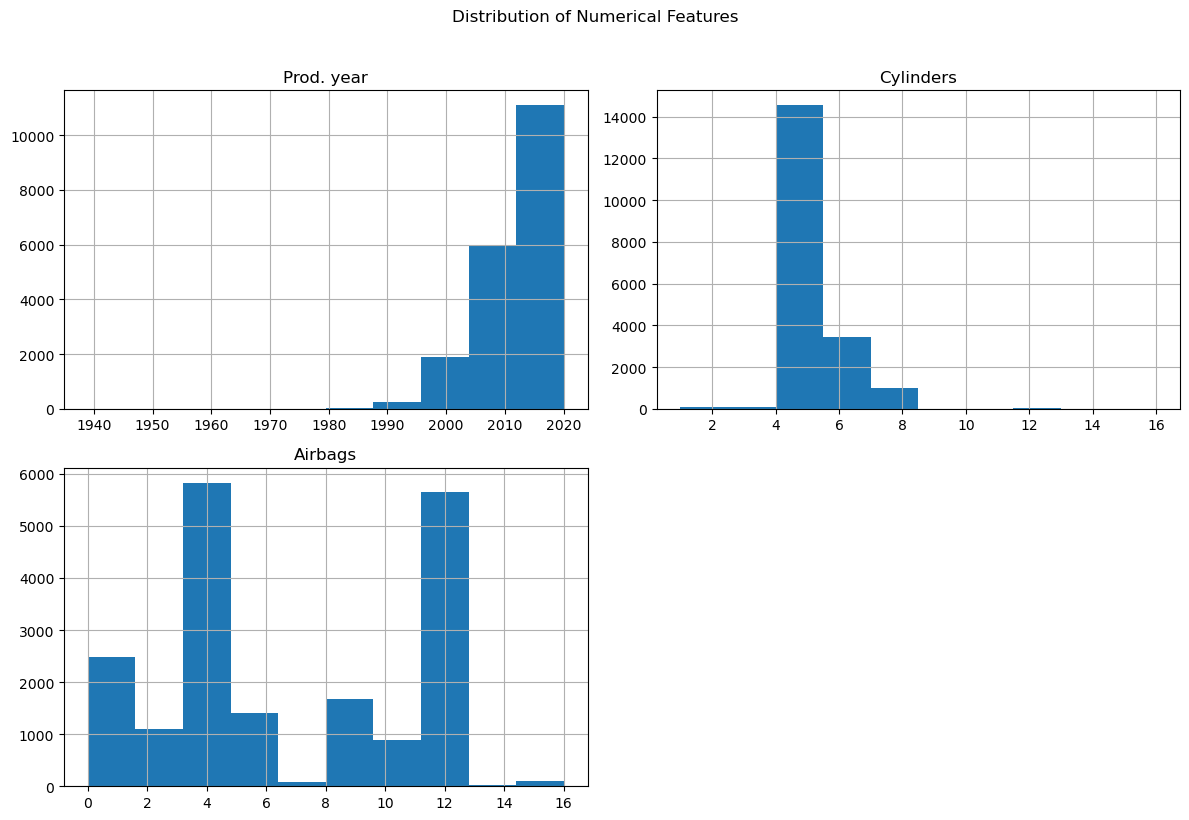

In [7]:
# Remove ID column (only the identifier)
if "ID" in df.columns:
    df = df.drop(columns=["ID"])

# Numerical features distribution
# To select the numerical features and exclude target variable
num_features = df.select_dtypes(include=["int64", "float64"]).columns
num_features = num_features.drop(col_y)

# Plot histograms for numerical features
df[num_features].hist(figsize=(12, 8))
plt.suptitle("Distribution of Numerical Features", y=1.02)
plt.tight_layout()
plt.show()


Insights:

This numerical features has showed the varied distribution across the dataset. 

For the Production year it is right-skewed, with most of the vehicle being manufactures after 2000, which indicates that the newer cars does dominate the dataset, While the Cylinders are concentrated to around 4-6, it suggest that most of the vehicle are using the standard engine configurations, while there are some with extreme values that are rare. But for the Airbags it displays a discrete distribution with peaks at the safety configurations, showing the standard manufacturer designs instead of the continuous variation. 

Overall, these distribution indicated that the numerical features aren't normally distributed and they do contain skewnedd.

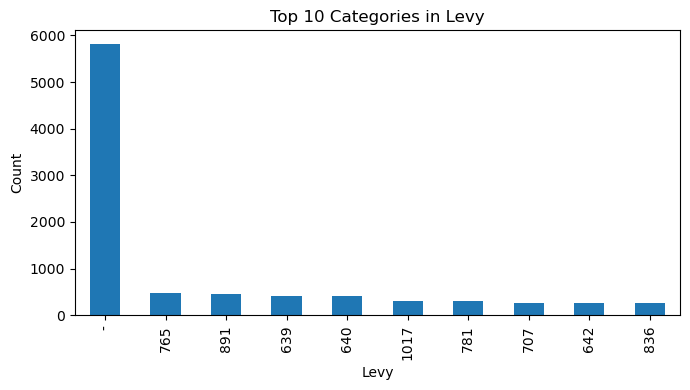

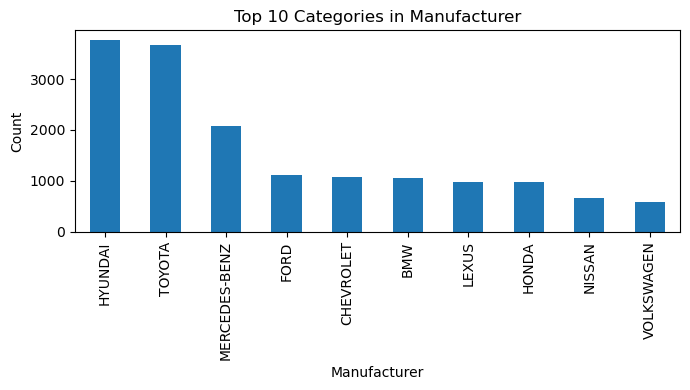

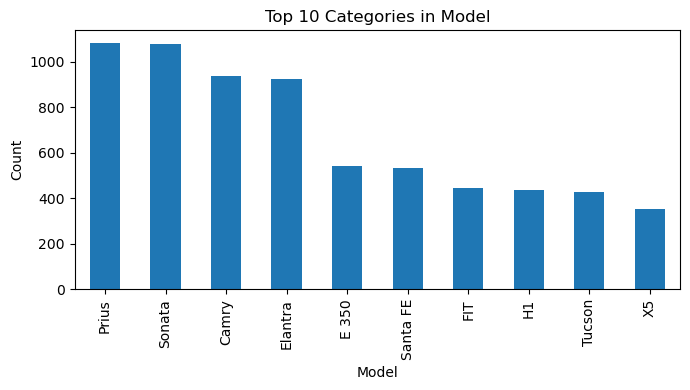

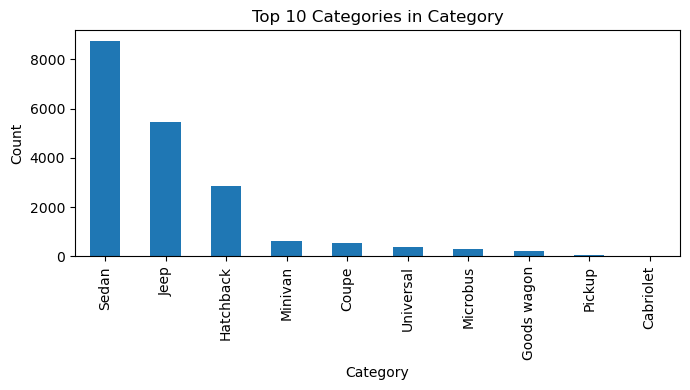

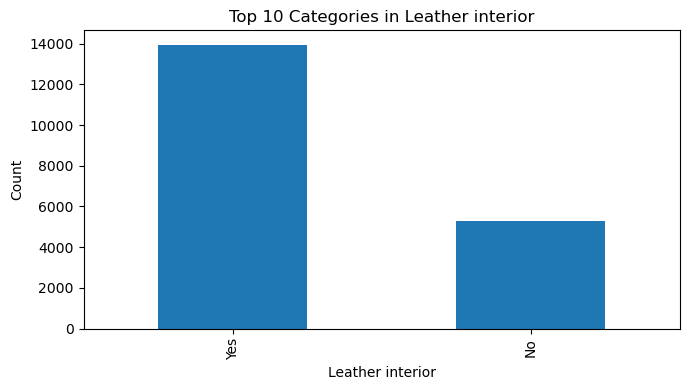

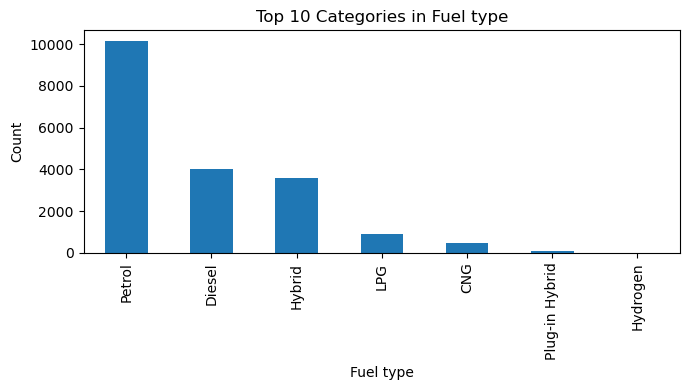

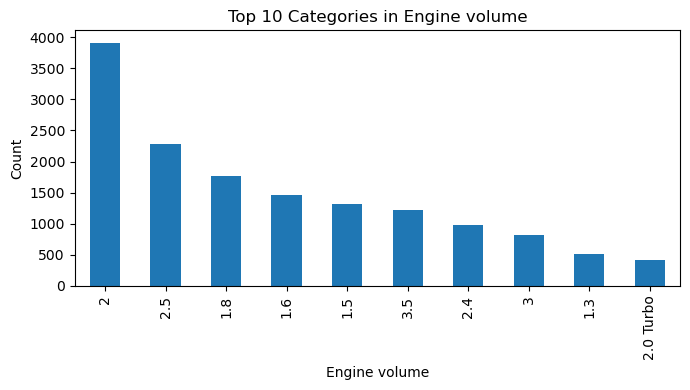

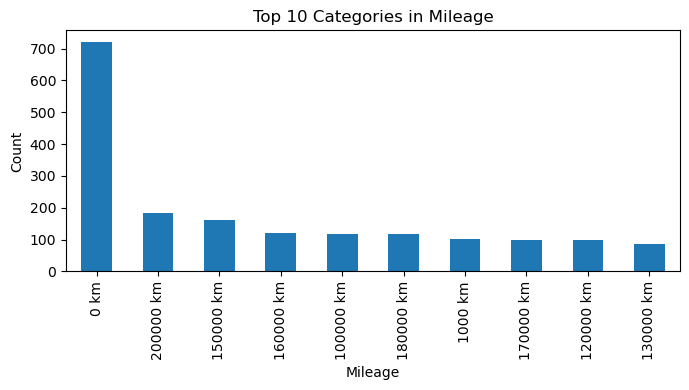

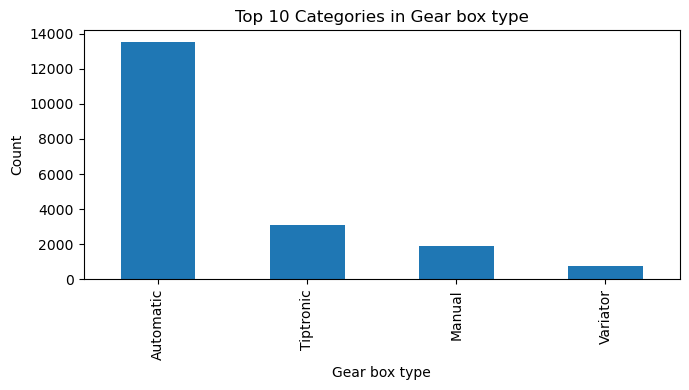

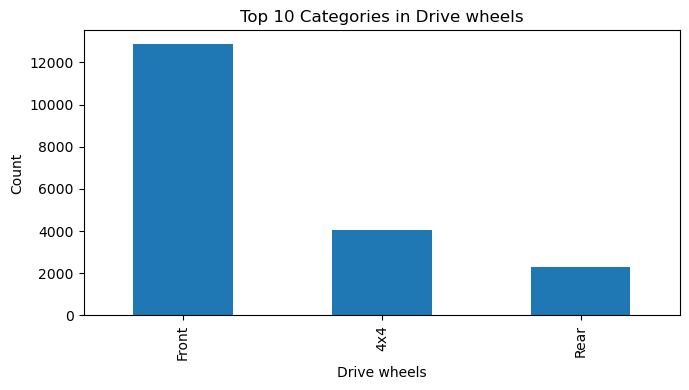

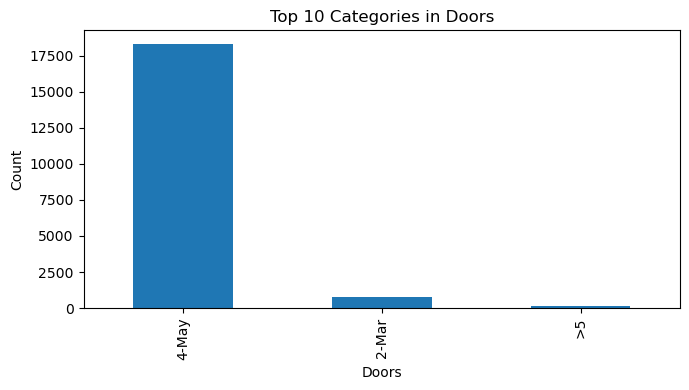

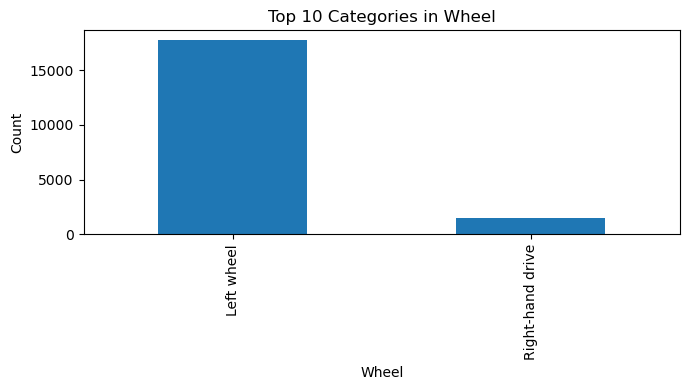

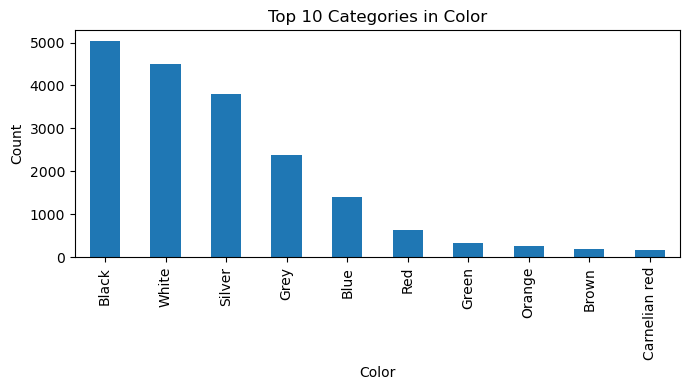

In [8]:
# Categorical features distribution
cat_features = df.select_dtypes(include=["object", "category"]).columns

# To plot the top 10 categories for each categorical feature
for col in cat_features:
    plt.figure(figsize=(7, 4))
    df[col].value_counts().head(10).plot(kind="bar")
    plt.title(f"Top 10 Categories in {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

Insights:

This categorical features has showed the varied distribution across the dataset. 

This was done to help me understand the frequency and alance of the categorical variaible within my dataset, its important as it helps with indetifying any domainant categories, rare values, and feature with limited variability, which could affect how well the machine learning model learns the pattern after encoding. 
By being able to vissualise the top categories for each of the feature, it help me to make a better informed decision on wheter to retain, group or remove and certain categorical variables before the modelling step. 

For the Category feature, the dataset is heavily domiated by Sedan, Jeep, and Hatchback vehicle types, while the categories such as Pickup, Cabriolet and Goods wagon appear very infrequently. So this indicates that there is a strong class imbalance withing the vehicle body types, where there is a small number of categories account for the majority of observations. 

For the Leather interior feature, it contains only two categories which is "Yes" and "No", but the vehicles that has the leather interiors appears more frequently. So this somewhat simple distribution suggests that the leather interiror is a more common characteristic within the dataset and may affect the difference in the vehicle quality or the pricing. 

For the Fuel type feature, it shows that there is a large proportion of Petrol vehicle in the dataset, followed by the Dieel and Hybrid vehicles. While in contrat, LPG,CNG, Plug in Hybrid and Hydrogen vehicles only occurs in small numbers. So this does highlight that the skewed distribution where alternative fuel type are underrepresented.

For the Gear box type feature, the Automatic transmission is the most prevalent, with the Tiptronic and the Manual transmissing appearing less frequently, while the Variator transmissing is also the least commong one. Hence, the distribution does reflect that there is a strong prefernece towards automatic transmission in the dataset.

For the Drive wheel feature, it is also imbalanced, with the Front-wheel drive(fwd) being the most common configuration, while the Rear-wheel drive and the All-wheel drive(awd) does appear less frequently. But despite the imbalance, there are multiple drivetrain (rwd) configuration that are in the dataset.

For the Wheel feature, it does show that majority of the vehicles are left-hand drive, while there is only a small portion of right-hand drive vehicles. Which indicates that there are limited variability in the steeering orientation. 

Lastly, the Doors_group feature, it shows that most of the vehicles have four or more doors (le_4), while vehicles that has lesser doors (gt_4) are more rare. So this does suggest that the dataset is heavily skewed towards the standard multi-door vehicles.

In conclusion, this analysis does show that a few of the variables are imbalances and have limited variation. Which helps provide me with a clearer understanding of the dataset to help with the later part of my data cleaning and feature engineering.

### 2.3.2 Understanding relationship between variables

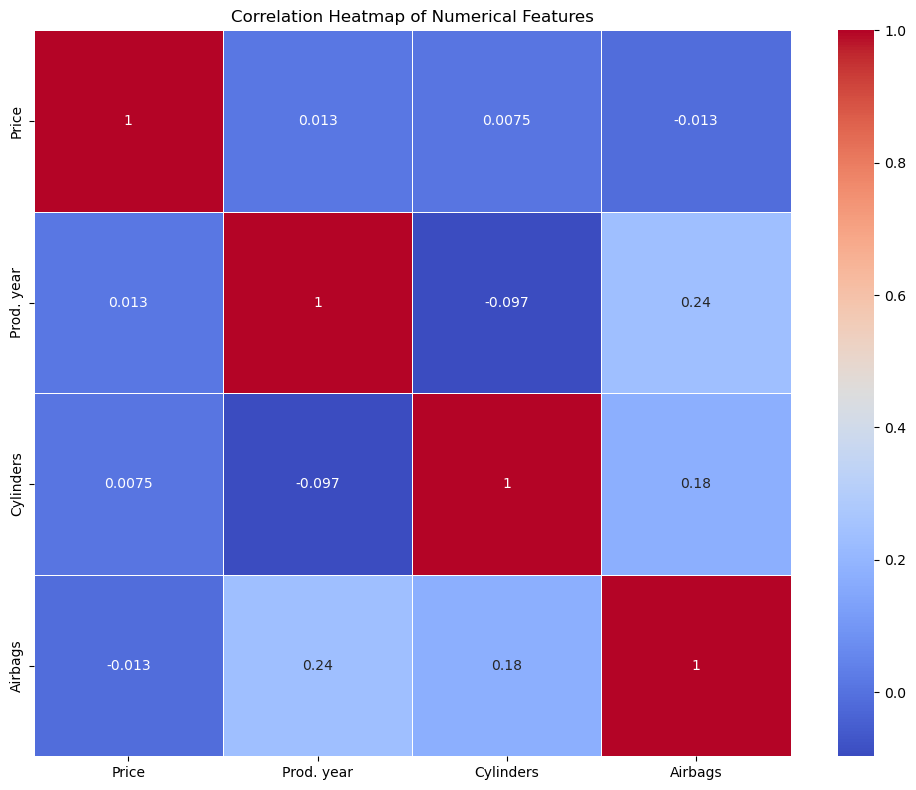

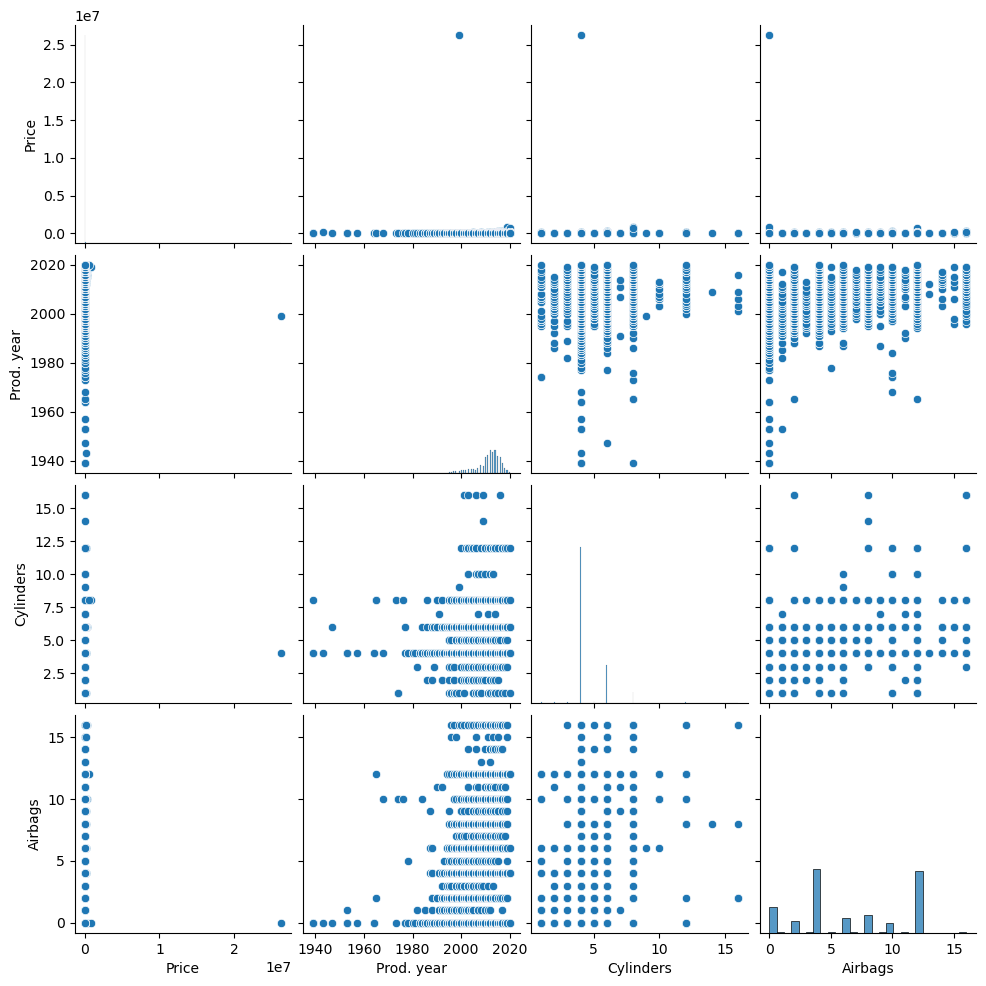

In [9]:
## Understanding relationship between variables

# Select numerical columns only
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
corr = df[num_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

# Pairplot for selected important numerical features
selected_features = [col_y] + list(
    df.select_dtypes(include=["int64", "float64"]).columns
    .drop(col_y)
    .sort_values()[:3]   # take a few numerical features only
)

sns.pairplot(df[num_cols])
plt.show()


Insights: 

The correlation heatmap (the first visual), it shows that the Pirce has a very weak correlations with the Production year, Cylinders, and Airbags, with the values being close to zero. Which indicates that the vehicle price dosent have a strong relationship with any of the single numerical variable. Although there is a little positive relationship between the Production year and the Airbags, which may suggest that the newer vehicles does have more safety features. 

While the pairplot (the second value), help to further support the finding as the scatter plots involving the Price does show a widely dispered points with no clear linear trend at all. As well as several numerical varibale does exhibit discrete values, which results in clustered patters rather than any continuous relationship.

Hence, this analysis does show there is a weak linear relationship between the numerical features and the Price, which shows that the Price might be affected by other multiple factors instead of just a single numerical attribute.

# 3. Data Preparation

## 3.1 Data Cleaning

In [10]:
## Data preprocessing - to drop any unnecessary columns
print("Initial dataset shape")
print(df.shape)

print("\nData types")
print(df.dtypes)

# Drop columns that are not required for modelling
drop_cols = ["ID", "Manufacturer", "Model", "Color"]
drop_exist = [c for c in drop_cols if c in df.columns]
df = df.drop(columns=drop_exist)

print("\nDropped columns")
print(drop_exist)

print("\nRemaining columns")
print(df.columns.tolist())

print("\nDataset shape after dropping columns")
print(df.shape)


Initial dataset shape
(19237, 17)

Data types
Price                int64
Levy                object
Manufacturer        object
Model               object
Prod. year           int64
Category            object
Leather interior    object
Fuel type           object
Engine volume       object
Mileage             object
Cylinders            int64
Gear box type       object
Drive wheels        object
Doors               object
Wheel               object
Color               object
Airbags              int64
dtype: object

Dropped columns
['Manufacturer', 'Model', 'Color']

Remaining columns
['Price', 'Levy', 'Prod. year', 'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage', 'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Airbags']

Dataset shape after dropping columns
(19237, 14)


Insights:

I have reviews the dataset structure, which includes its shape and the data types, so currently the dataset has 19237 records and 17 columns, which consist of both numerical and categorical features, but is 1 column short as I have previously dropped the "ID" column. 

The columns that aren't relevant are Manufacturer, Model and Color, as well as dropping "ID" again incase the top hasn't dropped it successfully yet, as none of this 4 columns provide any predictive value for the vehicle price, which they are either just descriptive or only used as a identifiers. 

After removing the columns, the current dataset has only 14 relevant features while reaining all the records. So this help with simplifying the dataset and ensuring that only attributes that are meaningful are kept for the preprocessing and modelling. 

In [11]:
def clean_numeric_col(series):
    s = series.astype(str).str.replace(",", "", regex=False).str.strip()
    s = s.replace(["-", "nan", "None", ""], np.nan)
    return pd.to_numeric(s, errors="coerce")


def boxplot_series(series, title, xlabel):
    plt.figure(figsize=(7, 3))
    plt.boxplot(series.dropna(), vert=False)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.tight_layout()
    plt.show()


def cap_outliers_iqr(series, k):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1

    low = q1 - k * iqr
    high = q3 + k * iqr

    capped = series.clip(lower=low, upper=high)
    return capped, low, high


This portion is to define the helper function that will be used for below, which includes a function to clean and convert the numeric columns stored as text, a function to help with visuallising the numerical distribution using boxplot, and a function to handle the outlier using the IQR method by capping the extreme values. 

So all this can help ensure that my numerical features are clean, consistent and would be suitable for modelling. 

Missing values in Price
0
Rows dropped due to missing Price
0
Price statistics before outlier handling
count    1.923700e+04
mean     1.855593e+04
std      1.905813e+05
min      1.000000e+00
25%      5.331000e+03
50%      1.317200e+04
75%      2.207500e+04
max      2.630750e+07
Name: Price, dtype: float64


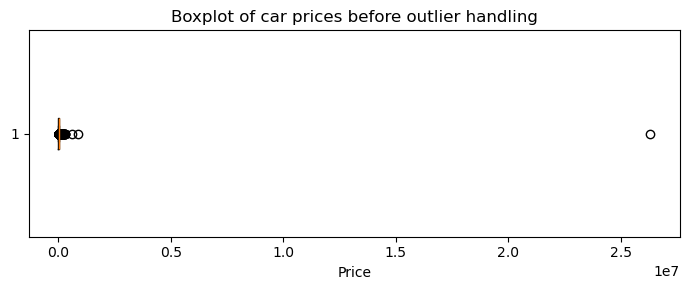

In [12]:
# Ensure Price is numeric
df["Price"] = clean_numeric_col(df["Price"])

print("Missing values in Price")
print(df["Price"].isna().sum())

before = len(df)
df = df.dropna(subset=["Price"])
print("Rows dropped due to missing Price")
print(before - len(df))

print("Price statistics before outlier handling")
print(df["Price"].describe())

boxplot_series(df["Price"], "Boxplot of car prices before outlier handling", "Price")

Outlier capping limits for Price
Lower cap
-11413.0
Upper cap
38819.0
Price statistics after outlier handling
count    19237.000000
mean     15234.153818
std      12061.520819
min          1.000000
25%       5331.000000
50%      13172.000000
75%      22075.000000
max      38819.000000
Name: Price_clean, dtype: float64


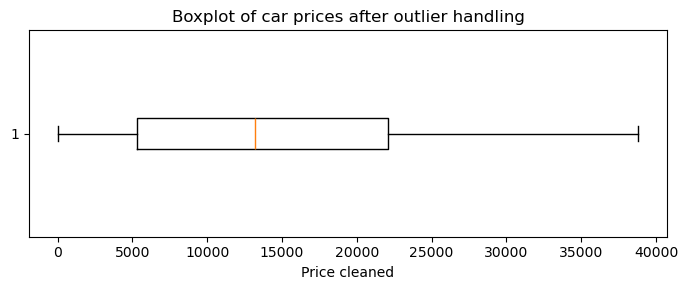

In [13]:
# Handle outliers using IQR capping
k = 1.0
df["Price_clean"], low, high = cap_outliers_iqr(df["Price"], k)

print("Outlier capping limits for Price")
print("Lower cap")
print(low)
print("Upper cap")
print(high)

print("Price statistics after outlier handling")
print(df["Price_clean"].describe())

boxplot_series(df["Price_clean"], "Boxplot of car prices after outlier handling", "Price cleaned")


Insights:

Before the outlier handling, the Price feature was analysed using the summary statistic and a boxplot, and though there wasn't any missing values, the distribution does show that there is an extreme price values, with a huge range between the minimum and the maximum prices. Hence the boxplot shows that there several high end outliers, which indicates that it is highly skewed price distribution that could negatively affect the model performance. 

As there is extreme values, I have decided to use the Interquartile Range (IQR) method to handle the outliers, instead of removing the obeservation, the outliers have been capped within the deined lower and upper bound. So that I am able to preserve all teh data point while reducing the influence of the extreme price values on the model.

After I had applied the IQR-based capping, the price distribution became more balanced, which the extreme values were now limited, so that the distribution is more stable and better suited for the machine learning models and helping with improving the robustness of the model.

Levy:
Levy statistics BEFORE filling missing values
count    13418.000000
mean       906.838128
std        461.867051
min         87.000000
25%        640.000000
50%        781.000000
75%       1058.000000
max      11714.000000
Name: Levy_raw, dtype: float64


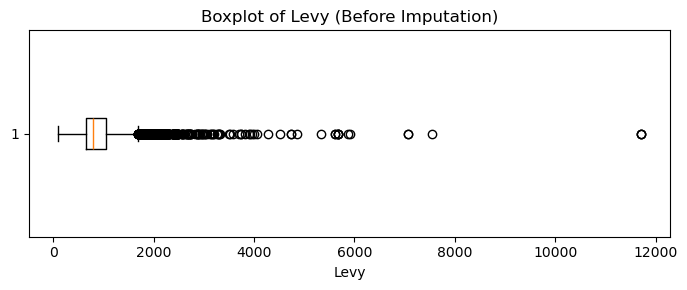

Levy statistics AFTER cleaning
count    19237.000000
mean       868.773353
std        390.040440
min         87.000000
25%        730.000000
50%        781.000000
75%        917.000000
max      11714.000000
Name: Levy, dtype: float64


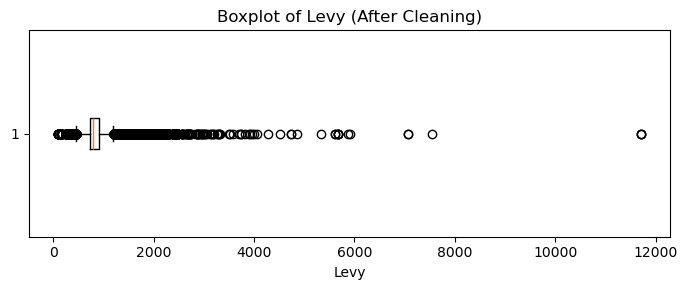

Production Year:
Production year statistics BEFORE cleaning
count    19237.000000
mean      2010.912824
std          5.668673
min       1939.000000
25%       2009.000000
50%       2012.000000
75%       2015.000000
max       2020.000000
Name: Prod. year, dtype: float64


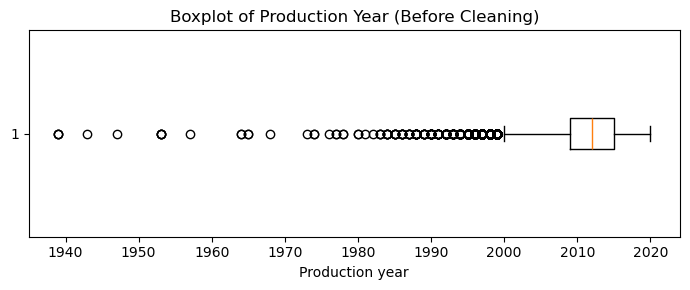

Rows removed with production year before 1990
69
Production year statistics AFTER cleaning
count    19168.000000
mean      2011.032085
std          5.250004
min       1990.000000
25%       2009.000000
50%       2012.000000
75%       2015.000000
max       2020.000000
Name: Prod. year, dtype: float64


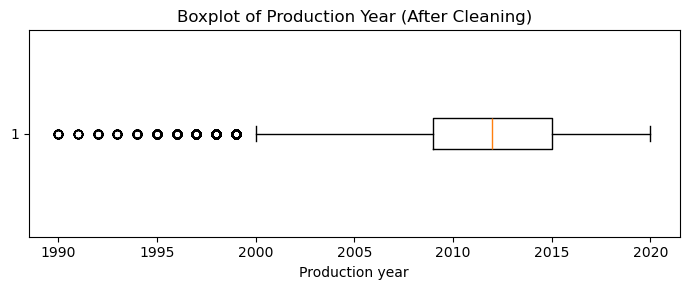

In [14]:
# Levy
print("Levy:")

# Convert the Levy to numeric FIRST
df["Levy_raw"] = clean_numeric_col(df["Levy"])

# BEFORE filling missing values
print("Levy statistics BEFORE filling missing values")
print(df["Levy_raw"].describe())

boxplot_series(df["Levy_raw"], "Boxplot of Levy (Before Imputation)", "Levy")

# Fill missing values
df["Levy"] = df["Levy_raw"].fillna(df["Levy_raw"].median())

# AFTER cleaning
print("Levy statistics AFTER cleaning")
print(df["Levy"].describe())

boxplot_series(df["Levy"], "Boxplot of Levy (After Cleaning)", "Levy")

# drop the helper column
df = df.drop(columns=["Levy_raw"])

# Production year
print("Production Year:")

# Before cleaning of the Production year
print("Production year statistics BEFORE cleaning")
print(df["Prod. year"].describe())

boxplot_series(df["Prod. year"], "Boxplot of Production Year (Before Cleaning)", "Production year")

# Clean Production year
df["Prod. year"] = pd.to_numeric(df["Prod. year"], errors="coerce")
df["Prod. year"] = df["Prod. year"].fillna(df["Prod. year"].median())

before = len(df)
df = df[df["Prod. year"] >= 1990]

print("Rows removed with production year before 1990")
print(before - len(df))

# After cleaning of the Production year
print("Production year statistics AFTER cleaning")
print(df["Prod. year"].describe())

boxplot_series(df["Prod. year"], "Boxplot of Production Year (After Cleaning)", "Production year")

Insights: 

For the Levy feature, intially it contains non-nuerical values such as the dashes "-", which has prevented it from being in the numerical analysis. Hence, I had converted the dashes "-" into missing values (NaN), after I had imputed these missing values using the median of the Levy value ensuring that the data completeness. After it was done processing, the Levy feature becomes fully numeric with no remaining missing values. Which the final statitcs and boxplots shows that the distribution remains right skewed, which tend to be expected for cost related attributes, so it is still suitable for modelling.

While for the Production year feature, although the values were already numeric and there was no missing values, I had still included the number conversion and imputation steps for consistency and incase I had any data had been missed out. I had remove vehicles that were produced before 1990, as these entries were relatively fewer and less representaitve of the current vehicle market. So after I had made the filtering, the distribution was more compact and it focuses more on the recent years, so that it is also more relevant for the machine learning models.

In [15]:
# Engine volume cleaning
print("\nEngine volume changes:")
print("- Converted to all lowercase")
print("- Removed any 'turbo' text")
print("- Extracted the numeric part (e.g., 2.0 from '2.0 turbo')")
print("- Converted any of the numeric and filled missing values with median")

ev = df["Engine volume"].astype(str).str.lower()
ev = ev.str.replace("turbo", "", regex=False)
ev = ev.str.extract(r"([\d\.]+)")
df["Engine volume"] = pd.to_numeric(ev[0], errors="coerce")
df["Engine volume"] = df["Engine volume"].fillna(df["Engine volume"].median())


# Mileage cleaning
print("\nMileage changes:")
print("- Converted to all lowercase")
print("- Removed all the 'km' text and commas")
print("- Replaced any invalid values such as ('-', '') with NaN")
print("- Converted any of the numeric and filled missing values with median")

m = df["Mileage"].astype(str).str.lower()
m = m.str.replace("km", "", regex=False).str.replace(",", "", regex=False).str.strip()
m = m.replace(["-", "nan", "None", ""], np.nan)
df["Mileage"] = pd.to_numeric(m, errors="coerce")
df["Mileage"] = df["Mileage"].fillna(df["Mileage"].median())

# Cylinders
print("\nCylinders changes:")
print("- Converted all to numeric")
print("- Filled in any missing values with median")

df["Cylinders"] = pd.to_numeric(df["Cylinders"], errors="coerce")
df["Cylinders"] = df["Cylinders"].fillna(df["Cylinders"].median())

# Airbags
print("\nAirbags changes:")
print("- Converted all to numeric")
print("- Filled in any missing values with median")

df["Airbags"] = pd.to_numeric(df["Airbags"], errors="coerce")
df["Airbags"] = df["Airbags"].fillna(df["Airbags"].median())

# Final checking 
print("\nMissing values after numeric cleaning (all the columns):")
print(df.isna().sum())



Engine volume changes:
- Converted to all lowercase
- Removed any 'turbo' text
- Extracted the numeric part (e.g., 2.0 from '2.0 turbo')
- Converted any of the numeric and filled missing values with median

Mileage changes:
- Converted to all lowercase
- Removed all the 'km' text and commas
- Replaced any invalid values such as ('-', '') with NaN
- Converted any of the numeric and filled missing values with median

Cylinders changes:
- Converted all to numeric
- Filled in any missing values with median

Airbags changes:
- Converted all to numeric
- Filled in any missing values with median

Missing values after numeric cleaning (all the columns):
Price               0
Levy                0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Airbags             0
Price_clean         0
dtype: int64


Insights:

For the Engine volume feature , there are values containing the text "turbo" were standardised by extracting the numeric component and converting the feature into  a numeric format. As well as, converting the feature into numeric format with missing values filled using a median. 

For the Mileage feature, the values were cleaned by removing any text, commas or invalid entries before doing the numeric conversion and median imputation. 

For the Cylinders and Airbags feature, the values were converted directly into a numeric format, and if there were any missing values they would be handles using the median. 

After all these steps, I had done a final check to ensure there are no more missing values across all the numerical features, so that they are prepared for the modelling.

In [16]:
# Identify the categorical columns
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

print("Categorical columns")
print(cat_cols)

print("Unique values per categorical column")
for c in cat_cols:
    print(c, df[c].nunique())

print("Top values per categorical column")
for c in cat_cols:
    print(c)
    print(df[c].value_counts().head())
    print()


Categorical columns
['Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel']
Unique values per categorical column
Category 11
Leather interior 2
Fuel type 7
Gear box type 4
Drive wheels 3
Doors 3
Wheel 2
Top values per categorical column
Category
Category
Sedan        8705
Jeep         5459
Hatchback    2843
Minivan       646
Coupe         527
Name: count, dtype: int64

Leather interior
Leather interior
Yes    13940
No      5228
Name: count, dtype: int64

Fuel type
Fuel type
Petrol    10094
Diesel     4030
Hybrid     3578
LPG         892
CNG         487
Name: count, dtype: int64

Gear box type
Gear box type
Automatic    13505
Tiptronic     3102
Manual        1815
Variator       746
Name: count, dtype: int64

Drive wheels
Drive wheels
Front    12863
4x4       4043
Rear      2262
Name: count, dtype: int64

Doors
Doors
4-May    18281
2-Mar      759
>5         128
Name: count, dtype: int64

Wheel
Wheel
Left wheel          17684
Right-hand drive     1

Insights:

The categorical features that has been identified are Category, Leather interior, Fuel type, Gear box type, Drive wheels, Wheel, and Doors_group which are all that have a few distinct value and are suitable for categorical encoding. 

For the Category feature, currently Sedan, Jeep and Hatchback are the top 3, while other vehicle types tend to appear less frequently. While the Leather interior and Wheel features are considered binary, with the leather interiors and left-hand drive vehicles being more common. 

For the Fuel type, Petrol vehicles makes up for most of the majority, followed by Diesel and Hybrid, wheras the other fuel types occurs less frequently. While the Gear box type, the majority is Automatic transmission while Tiptronic and Manual appears lesser. 

As well as for the Drive wheels, mostly are front-wheel drive vehicles, and for the Door_group it shows that most of the vehicle have four or more doors. 

Hence, there is currently an imabalnce and limited variantion for most of these categorical features, which give me a better overview for feature encoding and what I need to handle when preparing my model.

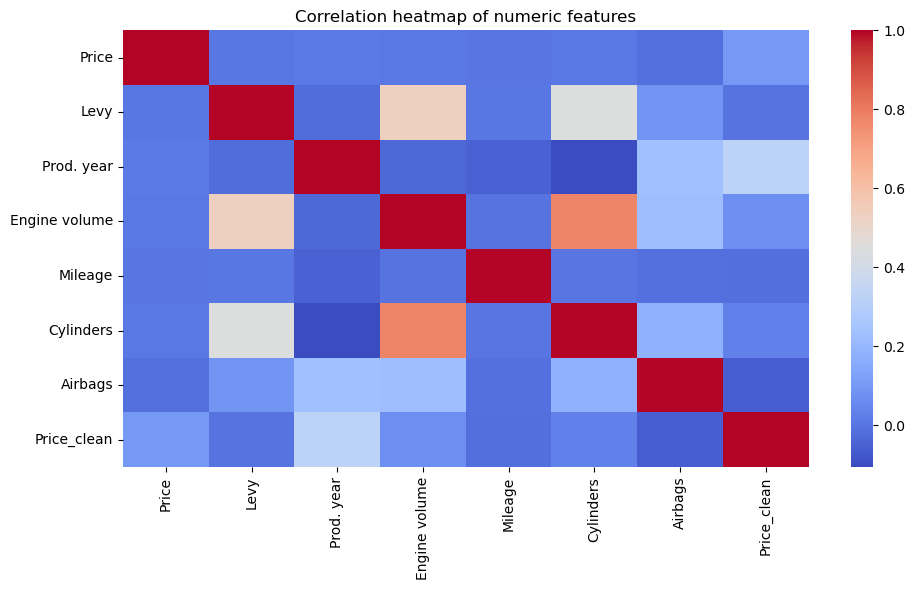

Correlation with Price_clean
Price_clean      1.000000
Prod. year       0.321713
Price            0.097194
Engine volume    0.070450
Cylinders        0.028216
Levy            -0.002803
Mileage         -0.018066
Airbags         -0.061589
Name: Price_clean, dtype: float64


In [17]:
# Correlation analysis but numeric only
num_df = df.select_dtypes(include=["number"]).copy()

plt.figure(figsize=(10, 6))
sns.heatmap(num_df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation heatmap of numeric features")
plt.tight_layout()
plt.show()

# Correlation with target
target = "Price_clean"

if target in num_df.columns:
    print("Correlation with " + target)
    print(num_df.corr()[target].sort_values(ascending=False))
else:
    print("Target column not found")
    print("Available numeric columns")
    print(num_df.columns.tolist())

Insights:

Currently this is the correlation analysis is using a heatmap where the color intensity represent the strength and directions the relationship between these numerical features, where if the warmer color such as red to orange, it represents a stronger positive correlations while the cooler color such as white to blue would represent a weaker or negative correlations. 

But most of the feature pairs appears in cooler shades, which shows that they have a weak linear relationship and  which shows that most of the numerical features does have a weak linear relationship with each other which indicates that there is limited correlation among each features.

But among all the features, Production year has one of the strongest postive correlation with the target variable, Price_clean, reflected by a lighter color (light blue) and a higher correlation value. But the other features such as Engine volume, Cylinders, Mileage, Levy and the Airbags does display a dark color which is value close to zero, indicating that it has a very weak relationship with the vehicle pricing. 

Hence, the heatmap does visually confirm that there is not a single numerical feature that can strongly determine the vehicle price, supporting the use of multivariate models.


In [18]:
# Category integer encoding
print("\nCategory - Before")
print(df["Category"].astype(str).value_counts().head(10))

cats = sorted(df["Category"].dropna().astype(str).unique())
cat_map = {v: i for i, v in enumerate(cats)}
df["Category_encoded"] = df["Category"].astype(str).map(cat_map)

print("\nCategory Encoding Map - After")
print(dict(list(cat_map.items())[:10]))

# Leather binary
print("\nLeather interior - Before")
print(df["Leather interior"].astype(str).str.lower().str.strip().value_counts(dropna=False))

leather = df["Leather interior"].astype(str).str.lower().str.strip()
df["Leather_binary"] = leather.map({"yes": 1, "no": 0})
df["Leather_binary"] = df["Leather_binary"].fillna(0).astype(int)

print("\nLeather interior - After")
print(df["Leather_binary"].value_counts(dropna=False))

# Wheel binary
print("\n Wheel - Before")
print(df["Wheel"].astype(str).str.lower().str.strip().value_counts(dropna=False))

wheel = df["Wheel"].astype(str).str.lower().str.strip()
df["Wheel_binary"] = np.where(wheel.str.contains("left", na=False), 0, np.nan)
df["Wheel_binary"] = np.where(wheel.str.contains("right", na=False), 1, df["Wheel_binary"])
df["Wheel_binary"] = df["Wheel_binary"].fillna(df["Wheel_binary"].mode().iloc[0]).astype(int)

print("\nWheel - After")
print(df["Wheel_binary"].value_counts(dropna=False))



Category - Before
Category
Sedan          8705
Jeep           5459
Hatchback      2843
Minivan         646
Coupe           527
Universal       362
Microbus        302
Goods wagon     231
Pickup           52
Cabriolet        35
Name: count, dtype: int64

Category Encoding Map - After
{'Cabriolet': 0, 'Coupe': 1, 'Goods wagon': 2, 'Hatchback': 3, 'Jeep': 4, 'Limousine': 5, 'Microbus': 6, 'Minivan': 7, 'Pickup': 8, 'Sedan': 9}

Leather interior - Before
Leather interior
yes    13940
no      5228
Name: count, dtype: int64

Leather interior - After
Leather_binary
1    13940
0     5228
Name: count, dtype: int64

 Wheel - Before
Wheel
left wheel          17684
right-hand drive     1484
Name: count, dtype: int64

Wheel - After
Wheel_binary
0    17684
1     1484
Name: count, dtype: int64


In [19]:
# Drive wheels standardisation
print("\nDrive wheels - Before")
print(df["Drive wheels"].astype(str).str.lower().str.strip().value_counts(dropna=False))

dw = df["Drive wheels"].astype(str).str.lower().str.strip()
df["Drive wheels"] = dw.replace({
    "front": "fwd",
    "rear": "rwd",
    "4x4": "awd",
    "4wd": "awd",
})

print("\nDrive wheels - After")
print(df["Drive wheels"].value_counts(dropna=False))

# Doors grouping
print("\nDoors_group - Before")
print(df["Doors"].astype(str).value_counts().head(10))

d = df["Doors"].astype(str).str.extract(r"(\d+)")
df["Doors"] = pd.to_numeric(d[0], errors="coerce")

if df["Doors"].notna().any():
    df["Doors"] = df["Doors"].fillna(df["Doors"].mode().iloc[0])
else:
    df["Doors"] = df["Doors"].fillna(4)

df["Doors_group"] = np.where(df["Doors"] <= 4, "le_4", "gt_4")

print("\nDoors_group - After")
print(df["Doors_group"].value_counts(dropna=False))


# Drop any duplicate row
before = len(df)
df = df.drop_duplicates()

print("\nDuplicate rows removed")
print(before - len(df))


Drive wheels - Before
Drive wheels
front    12863
4x4       4043
rear      2262
Name: count, dtype: int64

Drive wheels - After
Drive wheels
fwd    12863
awd     4043
rwd     2262
Name: count, dtype: int64

Doors_group - Before
Doors
4-May    18281
2-Mar      759
>5         128
Name: count, dtype: int64

Doors_group - After
Doors_group
le_4    19040
gt_4      128
Name: count, dtype: int64

Duplicate rows removed
3551


Insights:

I have futher processed the categorical features to prepare them before i train my models. 

For the Category feature, it was encoded using the integer encoding, where each unique vehicle category was mapped to a numerical value such as 'Cabriolet'as 0, 'Coupe' as 1. This is to help keep the category information while also allowing the feature to be used in the models that does require a numeric inputs. 

While there are some binary categorical features that were converted into numerical form for simplicity. Such as Leather interior feature, it has been encoded so that "yes" as 1 and "no" as 0, while for the Wheel feature it was encoded to distinguish the "left-hand drive" as 0 and the "right-hand drive" as 1. The value counts for both before and after encoding are there to ensure that the original distribution were preserved during the changes. 

For the Drive wheels, the textual variation such as the "front","rear","4x4" and "4wd" were standarised into a consistent labels instead which are "fwd","rwd" and for both last two it would be "awd" respectively. So this help to reduce the inconsistency in naming while maintaining the original meaning of its feature. 

For the Doors feature, it was clean by extracting the numeric door count and grouping it into two different categories, those that has less than 4 doors which is "le_4", and those that has more than 4 door under "gt_$". This is to simplify the feature and reduce the number of rare categories.

Lastly, there are duplicated rows which would be identified and remove to prevent any repeated records from being able to influence the model when its training. All this steps helps to ensure that the categorical features are consistenly encoded, and simplified when needed, and is ready for the modelling portion. 

In [20]:
print("Columns and data types in df before feature selection")
print(df.dtypes)
print("Columns list")
print(df.columns.tolist())

# Target
y = df["Price_clean"].copy()

# Columns to drop from modelling
drop_cols = [
    "Price",
    "Price_clean",
    "Category",
    "Leather interior",
    "Wheel",
    "Doors"
]

print("Columns planned to be dropped from X")
print(drop_cols)

# Build feature matrix
X = df.drop(columns=drop_cols, errors="ignore").copy()

Columns and data types in df before feature selection
Price                 int64
Levy                float64
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume       float64
Mileage               int64
Cylinders             int64
Gear box type        object
Drive wheels         object
Doors                 int64
Wheel                object
Airbags               int64
Price_clean           int64
Category_encoded      int64
Leather_binary        int64
Wheel_binary          int64
Doors_group          object
dtype: object
Columns list
['Price', 'Levy', 'Prod. year', 'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage', 'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Airbags', 'Price_clean', 'Category_encoded', 'Leather_binary', 'Wheel_binary', 'Doors_group']
Columns planned to be dropped from X
['Price', 'Price_clean', 'Category', 'Leather interior', 'Wheel', 'Doors']


Insights:

Before training the model, the target variable was defined as Price_clean, and the dataset was use to based off to select the relevant features. The original Price and Price_clean columns were then removed from the feature set to prevent any data leakage. 

In the original categorical columns such as Category, Leather interior, Wheel and Doors will be dropped as well as they had already been transformed into either encoded or as grouped features which means they have different column names. But the remaining of the dataset contains only the cleaned numerical and encoded categorical features, making it more suitable for model training. 

In [21]:
# Remove ID from modelling if any was present
if "ID" in X.columns:
    X = X.drop(columns=["ID"], errors="ignore")
    print("ID column removed from X")

print("Columns and data types in X before one hot encoding")
print(X.dtypes)

print("Columns remaining in X before one hot encoding")
print(X.columns.tolist())

# One hot encode the remaining categorical columns
X = pd.get_dummies(X, drop_first=True)

# Convert bool to int although it may be optional but it can help some model to be cleaner
for c in X.columns:
    if X[c].dtype == bool:
        X[c] = X[c].astype(int)

Columns and data types in X before one hot encoding
Levy                float64
Prod. year            int64
Fuel type            object
Engine volume       float64
Mileage               int64
Cylinders             int64
Gear box type        object
Drive wheels         object
Airbags               int64
Category_encoded      int64
Leather_binary        int64
Wheel_binary          int64
Doors_group          object
dtype: object
Columns remaining in X before one hot encoding
['Levy', 'Prod. year', 'Fuel type', 'Engine volume', 'Mileage', 'Cylinders', 'Gear box type', 'Drive wheels', 'Airbags', 'Category_encoded', 'Leather_binary', 'Wheel_binary', 'Doors_group']


Insights:

Before doing the encoding, I had to check the remaining features and their datatypes again to identify which is the categorical columns. But for assurance, I have added the "ID" columns removal in case I had missed out previously again as I need to prevent it from influencing the model, since it dosent contian any predictive information.

Currently the remaining categorical features, such as the Fuel type, Gear box type, Drive wheels and the Doors_group, were converted into numerical form using the One-hot encoding (OHE). So this allows the model to be properly interpret as a categorical data. The "drop_first=True" option is used to help with reducing the redundancy in the encoded features.

Lastly, if there are any boolean values that were produced during encoding would be converted into integers to ensure that it is compatible with the machine learning models. After all these steps, the feature matric would only consist of entirely numerical values and it would be ready for model training.

In [22]:
# Fill missing values
X = X.fillna(0)

print("Columns and data types in X after one hot encoding")
print(X.dtypes)

print("Columns used for modelling after encoding")
print(X.columns.tolist())

print("Final feature matrix shape")
print(X.shape)

print("Target shape")
print(y.shape)

print("Count of data types in X")
print(X.dtypes.value_counts())

print("Remaining object or category columns in X")
print(X.select_dtypes(include=["object", "category"]).columns.tolist())

print("Columns used for training")
print(X.columns.tolist())

# Save to clean csv to see the final feature matrix
X.to_csv("cleaned_X.csv", index=False)

Columns and data types in X after one hot encoding
Levy                        float64
Prod. year                    int64
Engine volume               float64
Mileage                       int64
Cylinders                     int64
Airbags                       int64
Category_encoded              int64
Leather_binary                int64
Wheel_binary                  int64
Fuel type_Diesel              int64
Fuel type_Hybrid              int64
Fuel type_Hydrogen            int64
Fuel type_LPG                 int64
Fuel type_Petrol              int64
Fuel type_Plug-in Hybrid      int64
Gear box type_Manual          int64
Gear box type_Tiptronic       int64
Gear box type_Variator        int64
Drive wheels_fwd              int64
Drive wheels_rwd              int64
Doors_group_le_4              int64
dtype: object
Columns used for modelling after encoding
['Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags', 'Category_encoded', 'Leather_binary', 'Wheel_binary', 'Fuel ty

Insights:

After I have done the One-hot encoding (OHE), all the remaining categorical features has been successfully converted into numerical form, and if there were any missing values it would have jus tbeen replaced with zeros. For the final last check to confirm there weren't any remaining object or categorical columns in the feature matric.But only for both Levy and Engine volume feature, they are stored as float values as they at first has non-integer values and were handled using numeric conversion and median imputations. Hence using floating point data type would help them to display the decimal values more accurately and to ensure that its compatible with the machine learning models.

The final feature matric now has 15617 records and 21 feautres, although the target variable still has the same number of records, but now the dataset has mix of integer and float feature, which are suitable for the machine learning models and this helps me to confirm that it is fully prepared with consistent feature types and there are no missing values and is the model is ready to be trained.


## 3.2 Train-Test Split

In [23]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (12493, 21)
X_test shape: (3124, 21)
y_train shape: (12493,)
y_test shape: (3124,)


Insights:

For my dataset, I have split the training and the testing sets using 80/20 split to evaluate the model performance fairly. 

So the training set would contain at least 12493 rows and 21 features to be used to train the model while the test would contian 3124 rows and 21 features to be kept aside for the final evaluation. 

To ensure that the split is reproducible, there is a fixed "random_state=42", which means that if I were to rerun my code it would still obtaine the same results.

# 4. Modelling

### 4.2 Train Model

In [24]:
# Models
lr_model = LinearRegression()

dt_model = DecisionTreeRegressor()


rf_model = RandomForestRegressor()

# Gradient Boosting
gbr_model = GradientBoostingRegressor()

# Fit
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gbr_model.fit(X_train, y_train)

print("Models trained successfully")
print("- Linear Regression")
print("- Decision Tree")
print("- Random Forest")
print("- Gradient Boosting")


Models trained successfully
- Linear Regression
- Decision Tree
- Random Forest
- Gradient Boosting


Insights:

I have decided to use different regression models to train as I wanted to compare their performance based on the same dataset. The models are Linear Regression, Decision Tree, Random Forest and Gradient Boosting, which represents both simple and a more advance approaches. 

All the models were trained using the same training data to ensure that it is a fair comparison and that it will be easier to view their strength and weakness later based on the same test set.

# 5. Model Evaluation

In [25]:
def eval_reg(model, X_te, y_te):
    pred = model.predict(X_te)
    mae = mean_absolute_error(y_te, pred)
    rmse = np.sqrt(mean_squared_error(y_te, pred))
    r2 = r2_score(y_te, pred)
    return pred, mae, rmse, r2


models = {
    "Linear Regression": lr_model,
    "Decision Tree Regressor": dt_model,
    "Random Forest Regressor": rf_model,
    "Gradient Boosting Regressor": gbr_model
}

results = []
preds = {}

for name, m in models.items():
    pred, mae, rmse, r2 = eval_reg(m, X_test, y_test)
    preds[name] = pred
    results.append({"Model": name, "MAE": mae, "RMSE": rmse, "R2": r2})

results_df = pd.DataFrame(results).sort_values(by="R2", ascending=False)
print("Model Evaluation sorted by R2")
print(results_df)

Model Evaluation sorted by R2
                         Model          MAE         RMSE        R2
2      Random Forest Regressor  4165.932640  6351.227512  0.707789
3  Gradient Boosting Regressor  5297.816389  7212.092233  0.623206
1      Decision Tree Regressor  5216.845391  8426.117246  0.485676
0            Linear Regression  7351.529331  9244.889572  0.380865


Insights:

All the models were evaluated using the MAE, RMSE and R² to compare their prediction accuracy and the overall performance.For the MAE and RMSE it helps to measure the average prediction error, so if the value is lower, it tends to indicate that there is a more accurate prediction, while for the R² it helps to measure how well the model is able to explain the variation in the vehicle prices, where if its a higher value that means it indicate a better explanatory power.

Currently based on the results, the Random Forest Regressor is performing the best as it manage to achieve the lowest MAE and the RMSE and the higher R² value among all the other models. 

This indicated that the Random Forest is able to predict the vehicle prices with a smaller average errors while expanding a larger proportion of the variance in the target variable. But compared to the other simpler models such as the Linear Regression and Decision Tree they showed a higher prediction errors and lower explantory power since their R² are both the lowest. 

Overall, the evaluation helps to suggest that the Random Forest model is the most suited for this task, since its better at capturing the complex relationships between the features nad being able to provide a more reliable price prediction.


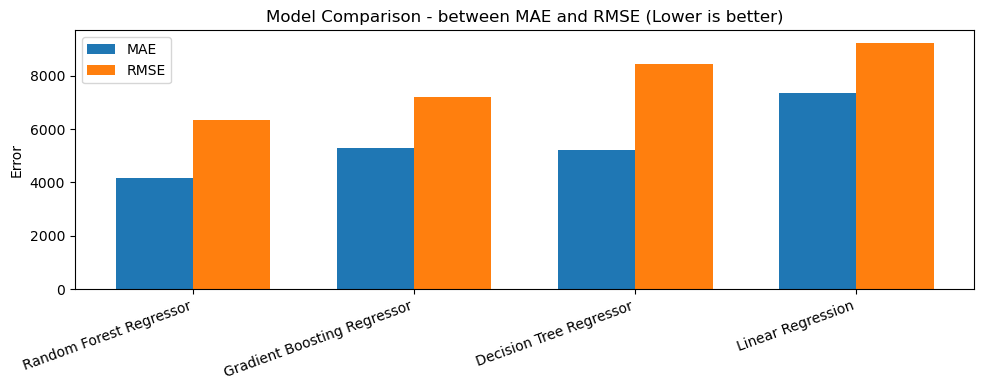

In [26]:
# To compare between the MAE and RMSE together
df_plot = results_df.sort_values("R2", ascending=False).copy()

x = np.arange(len(df_plot))
w = 0.35

plt.figure(figsize=(10, 4))
plt.bar(x - w/2, df_plot["MAE"], width=w, label="MAE")
plt.bar(x + w/2, df_plot["RMSE"], width=w, label="RMSE")
plt.xticks(x, df_plot["Model"], rotation=20, ha="right")
plt.title("Model Comparison - between MAE and RMSE (Lower is better)")
plt.ylabel("Error")
plt.legend()
plt.tight_layout()
plt.show()

Insights:

The bar chart is used to compare the MAE and the RMSE values across all the models, whereas the lower the value the better the performance is. Each of the models has two different bar which MAE is represented by the blue color that is average prediction error and the RMSE that is represented by the orange is to give more weight to the larger erros. 

But from this chart, the Random Forest Regressor has the lowest MAE and RMSE, which shows that it produces the most accurate predictions with lesser large errors. While the Gradient Boosting Regressors performs slightly worse than the Random Forest but it is still better compared to the other two which is the Decision Tree and Linear Regression.

Currently the Decision Tree Regressor shows a higher RMSE compared to its MAE, which does indicate that its more affected by the large prediction errors. Compared to the Linear Regression model where its performing the worst with the highest MAE and RMSE, which suggest that it is struggling to capture the complex relationships in the data. 

Therefore, I cn conlude that the Random Forest is the most reliable model, since it has consistently achieve the lowest errors while handling an extreme price values more effectively than the other 3 models.

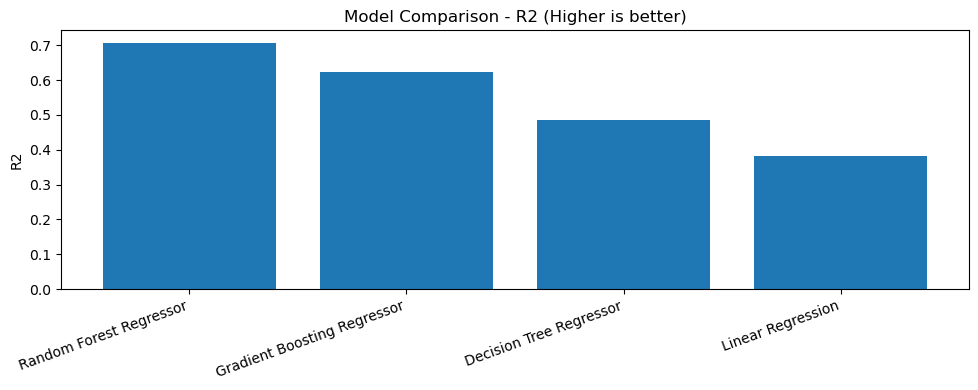

In [27]:
# The R2 chart
plt.figure(figsize=(10, 4))
plt.bar(df_plot["Model"], df_plot["R2"])
plt.title("Model Comparison - R2 (Higher is better)")
plt.xticks(rotation=20, ha="right")
plt.ylabel("R2")
plt.tight_layout()
plt.show()

Insights:

This bar chart is used to help me compare the R² score across all the models, where if the value is high it indicates a better and stronger explanatory power. 

Currently, it is clear the the Random Forest regressor has achieved the highest R², showing that it explains the largest proportion of variance in the vehicle prices. While the second best is the Gradient Boositng, but the bottom two would be the Decision tree and Linear Regression which indicated that they are a weaker overall model fit. 

Hence, this visual help with supporting the earlier finding that Random Forest does provide the best overall performance for this task.

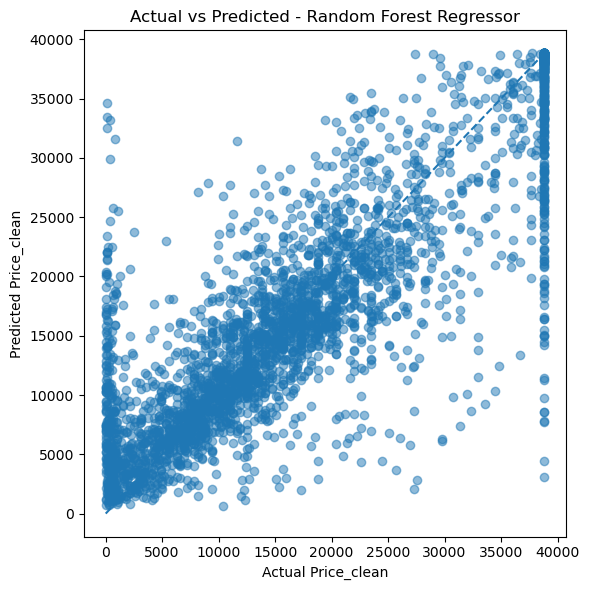

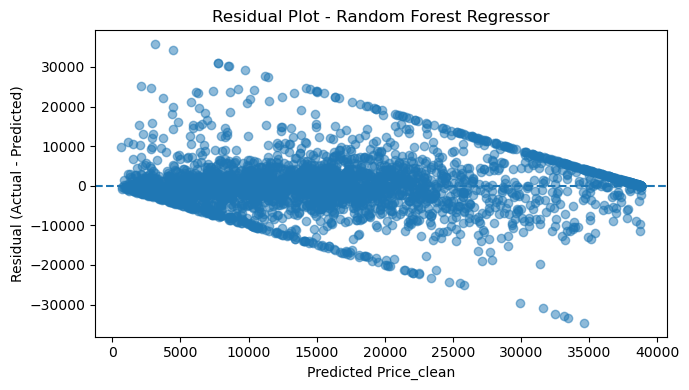

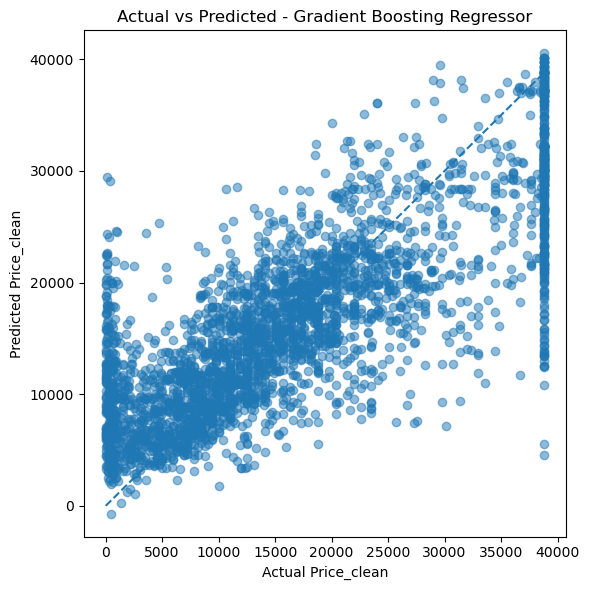

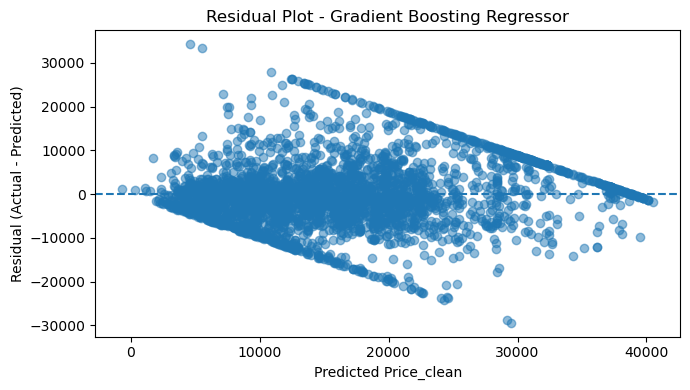

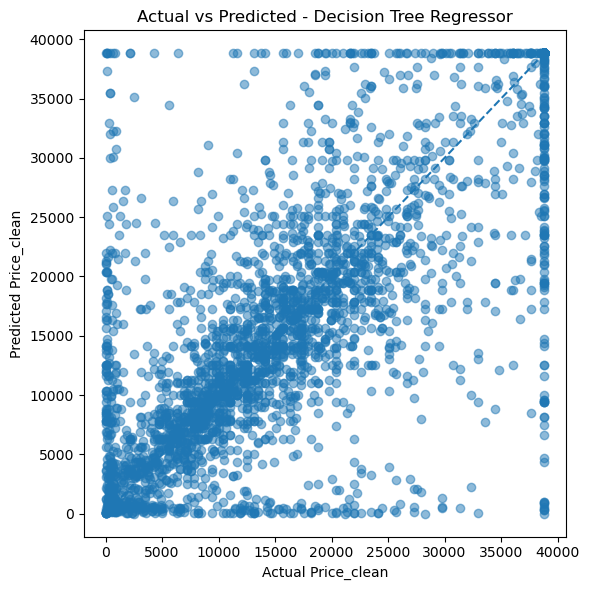

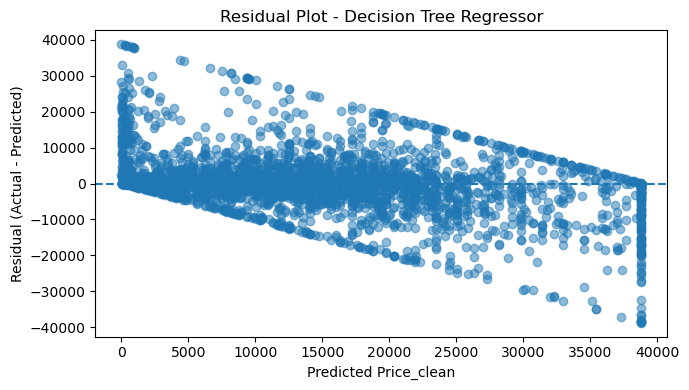

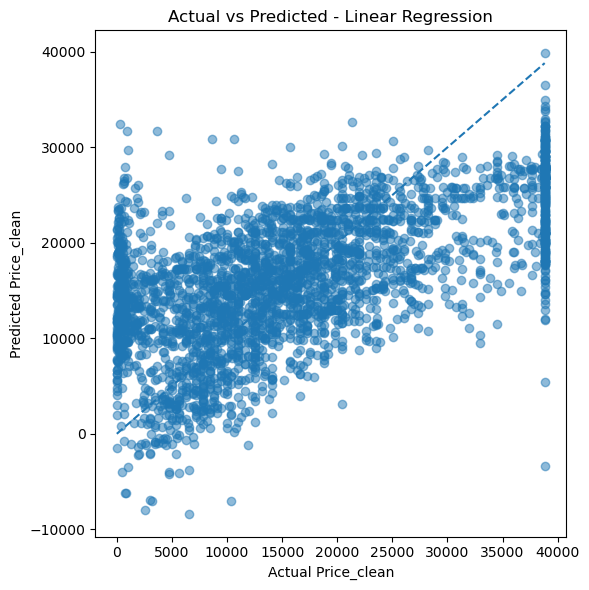

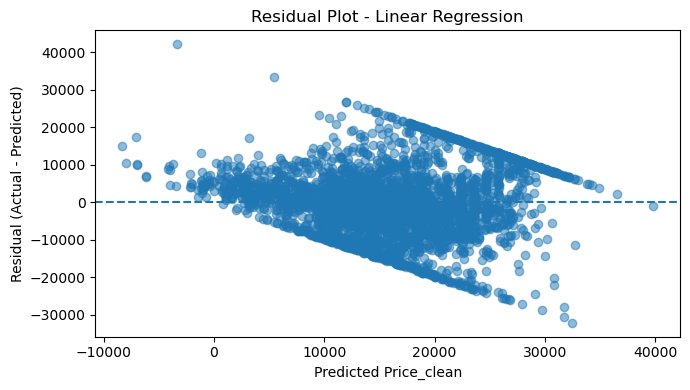

In [28]:
# To get a visual for each of the model performance 
for name in df_plot["Model"]:
    pred = preds[name]
    residuals = y_test - pred

    # Actual vs Predicted
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle="--")
    plt.title(f"Actual vs Predicted - {name}")
    plt.xlabel("Actual Price_clean")
    plt.ylabel("Predicted Price_clean")
    plt.tight_layout()
    plt.show()

    # Residual plot
    plt.figure(figsize=(7, 4))
    plt.scatter(pred, residuals, alpha=0.5)
    plt.axhline(0, linestyle="--")
    plt.title(f"Residual Plot - {name}")
    plt.xlabel("Predicted Price_clean")
    plt.ylabel("Residual (Actual - Predicted)")
    plt.tight_layout()
    plt.show()

Insights:

This Actual vs Predicted plots helps to show how closely each of the model's predictions align with the true vehicle prices. So models that perform better would have points that tend to cluster more closely around the diagonal reference line, indicating that the predictions are closer to the actual values. 

Currently fromt the visuals of the Random Forest and Gradient Boosting it shows a tigther clustering along the line, as compared to the Decision Tree and the Linear Regression it is displayed a more scattered predictions, especially at the higher price ranges.

While the Residual plots help with accessing the prediciton errors by showing the difference between the actual and predicted prices. So for the most ideal resuly, the residual should be randomly spread around the zero with no clear pattern. For the Random Forest model it does show a more compact and balanced residual distribution, suggesting that it is has a more stable prediction across the different price ranges. But in comparison. both the Decision Tree and Linear Regression models shows a wider residual spreads and clearer patterns indication the larger errors and its performance being less consistent. 

Conclusion:

After all the visual anaysis, it does help to support that the earlier metric based evaluation still shows that Random Forest does provide the most reliable and consistent predictions, whereas those simpler models are struggling to capture the complexity of the data, especially for those higher priced vehicles.

Hence, Random Forest Regressor would be the most suitable model to help predict the best car price for this dataset. 

## Choosen metrics to focus on - Root Mean Squared Error (RMSE)

I have choosen to focus on the Root Mean Squared Error (RMSE) as the primary evalustion for the Iterative model development, as it penalises larger prediction errors more heavily compared to the MAE. 

THis is quite important for price prediction for vehicles, where if there is a large errors on higher-priced cars, it would have a greater impact on the overall model usefulness and reliability. So by giving more wright to these extreme errros, the RMSE helps to provide a clearer indication of how well the model is able to handle ecpensive vehicles and any outliers in the dataset,As well as the R² will be used as the supporting metric to asses how much the cariance in the vehicles prices is explained by hte model.

So, the RMSE and the R² will help to provide a more balanced evaluation by capturing both prediction accuracy and overall explanatory power, and making them a suitable metrics for comparing the models, doing the feature engineering improvements and hyperparameter tuning results.

## Iterative model development


## Feature Engineering

In [29]:
# Feature Engineering using cleaned dataset from mode evaluation
# Using the baseline Random Forest results from model evaluation to reused for comparison

df_fe = df.copy()

# Create car age from production year
df_fe["Car_Age"] = 2026 - df_fe["Prod. year"]

# Log transform mileage to reduce skew
df_fe["Mileage_log"] = np.log1p(df_fe["Mileage"])

# Interaction feature combining engine size and age
df_fe["Engine_per_Age"] = df_fe["Engine volume"] / (df_fe["Car_Age"] + 1)

# Target variable
y_fe = df_fe["Price_clean"].copy()

# Drop target and unused columns
drop_cols = [
    "Price",
    "Price_clean",
    "Prod. year",
    "Mileage"
]

X_fe = df_fe.drop(columns=drop_cols, errors="ignore")

# One hot encode remaining categorical variables
X_fe = pd.get_dummies(X_fe, drop_first=True)

# Ensure no missing values remain
X_fe = X_fe.fillna(0)

# Train test split using same random state
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(
    X_fe,
    y_fe,
    test_size=0.2,
    random_state=42
)

# Train Random Forest on engineered features
rf_fe = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf_fe.fit(X_train_fe, y_train_fe)
pred_fe = rf_fe.predict(X_test_fe)

# Evaluate feature engineered model
mae_fe = mean_absolute_error(y_test_fe, pred_fe)
rmse_fe = np.sqrt(mean_squared_error(y_test_fe, pred_fe))
r2_fe = r2_score(y_test_fe, pred_fe)

print("Random Forest after Feature Engineering")
print("MAE:", round(mae_fe, 2))
print("RMSE:", round(rmse_fe, 2))
print("R2:", round(r2_fe, 4))


Random Forest after Feature Engineering
MAE: 4181.15
RMSE: 6376.77
R2: 0.7054


Insights:

The feature engineering was used to help with improving the Random Forest model by creating more informative features from the existing data. 

Some of the improvement that were made was a new Car_Age feature was dervied from the Production year feature to represent the vehicle depreciation over time better. Another one was the Mileage feature which was log-transformed to reduce the skewness and limited the influence of the extreme mileage values. Another interaction feature would be the Engine_per_Age, to capture the relationship between the engine size and the vehicle age, which could influence the pricing mroe effective rather than the features being on its own.

After I have created these features, the dataset was re-encoded, if there were any missing values it was also handled, and the same train-test split was also used ensuring that it is a fair comparison with the baseline model above. 

When doing the evaluation using the RMSE and R², this feature engineered model shows that there is a slight increase in the RMSE but there is a small decrease in the R² compared to the baseline model. 

That does indicate that the engineered features didn't improve the model's generalisation performance on the unseen data. But this could also be that the baseline Rnadom Forest model may have already capture most of the useful patterns in the original features, and the newly engineered features may have redundancy or noise, that could affect the model performance. 

Although the feature engineering on its own did not help with any improvement to the model performance in this iteration, but it would help us to have a starting foundation for the next step which is the hyperparameter tuning.

## Hyperparameter Tuning

In [30]:
def print_metrics(title, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = float(np.sqrt(mean_squared_error(y_true, y_pred)))
    r2 = r2_score(y_true, y_pred)

    print(title)
    print("MAE:", round(mae, 2))
    print("RMSE:", round(rmse, 2))
    print("R2:", round(r2, 4))
    print()
    return mae, rmse, r2

# Baseline engineered model results for comparison
pred_fe = rf_fe.predict(X_test_fe)
mae_fe, rmse_fe, r2_fe = print_metrics(
    "Random Forest after Feature Engineering",
    y_test,
    pred_fe
)

# Hyperparameter tuning using the engineered model as the estimator
param_grid = {
    "n_estimators": [120, 150, 200],
    "max_depth": [15, 20, 35],
    "min_samples_split": [4, 5, 6],
    "min_samples_leaf": [1, 2, 3],
    "max_features": ["log2", "sqrt"]
}

cv = KFold(n_splits=3, shuffle=True, random_state=42)

search = RandomizedSearchCV(
    estimator=rf_fe,
    param_distributions=param_grid,
    n_iter=20,
    cv=cv,
    scoring="r2",
    n_jobs=-1,
    random_state=42
)

search.fit(X_train_fe, y_train)

rf_tuned = search.best_estimator_
pred_tuned = rf_tuned.predict(X_test_fe)

mae_tuned, rmse_tuned, r2_tuned = print_metrics(
    "Random Forest after Hyperparameter Tuning",
    y_test,
    pred_tuned
)

print("Best parameters found")
print(search.best_params_)
print()

final_model = rf_tuned
final_stage = "Hyperparameter Tuning"
if r2_tuned < r2_fe:
    final_model = rf_fe
    final_stage = "Feature Engineering"

print("Final model selected stage:", final_stage)
print("Final R2:", round(max(r2_fe, r2_tuned), 4))

Random Forest after Feature Engineering
MAE: 4181.15
RMSE: 6376.77
R2: 0.7054

Random Forest after Hyperparameter Tuning
MAE: 4229.18
RMSE: 6228.54
R2: 0.719

Best parameters found
{'n_estimators': 200, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 35}

Final model selected stage: Hyperparameter Tuning
Final R2: 0.719


Insights:

To help further optimise the Random Forest model I have done hyperparameter tuning. A RandomizedSearchCV was used to be efficiently explore the different combinations of a key parameters such as the number of trees (n_estimators), the tree depth(max_depth), the minimum samples that is requiquired to split a node, and the number of features that are considered at each split. 

The tuning process uses a 3 fold cross validation and optimised for the R², so that it ensure the search parameters can improve the model's ability to explaint he variance while also maintaining the generalisation to unseen data. 

After the tuning, the model now shows a lower RMSE and a higher R² compared to the feature engineered baseline. Which indicates that the tuned models is able to produce more accurate predictions and does explain a larger proportions of the variation in the vehicle prices. 

Although the MAE increased slightly, the improvement in the RMSE does suggests better handling of larger errros, which is quite important for higher priced vehicles. 

In conclusion, the hyperparameter tuned Random Forest is the final model, as it was able to achieve the best balance between the predictive accuracy and explanatory power among all the tested iterations. 

## Streamlit

In [31]:
import joblib

joblib.dump(final_model, "best_car_price_model.pkl")

['best_car_price_model.pkl']